# BAĞIMSIZ İKİ ÖRNEKLEM T-TESTİ

H0: x1 = x2

H1: x1 != x2

In [49]:
import pandas as pd

In [50]:
import numpy as np

In [ ]:
#VERİ TİPİ 1

In [71]:
A=pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])

In [72]:
B=pd.DataFrame([37,39,31,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,26,32,33,29])

In [73]:
A_B=pd.concat([A,B],axis=1)

In [74]:
A_B.columns=["A","B"]

In [75]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,31


In [ ]:
#VERİ TİPİ 2

In [ ]:
#A ve A GRUBU

In [76]:
GRUP_A=np.arange(len(A))
GRUP_A=pd.DataFrame(GRUP_A)
GRUP_A[:]="A"
A =pd.concat([A,GRUP_A],axis=1)

In [16]:
#B ve B GRUBU

In [77]:
GRUP_B=np.arange(len(B))
GRUP_B=pd.DataFrame(GRUP_B)
GRUP_B[:]="B"
B=pd.concat([B,GRUP_B],axis=1)

In [ ]:
#Tüm Veri

In [78]:
AB=pd.concat([A,B])
AB.columns=["Gelir","GRUP"]

print(AB.head())
print(AB.tail())

   Gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    Gelir GRUP
25     32    B
26     26    B
27     32    B
28     33    B
29     29    B


<Axes: xlabel='GRUP', ylabel='Gelir'>

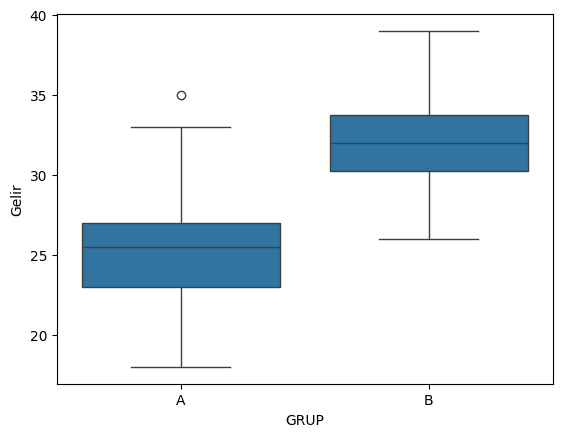

In [80]:
import seaborn as sns
sns.boxplot(x="GRUP",y="Gelir",data=AB)

# Varsayım Kontrolü

In [81]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,31


In [82]:
AB.head()

,Gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [ ]:
#normallik varsayımı

In [83]:
from scipy.stats import shapiro


In [84]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [85]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9507693648338318, pvalue=0.1772691011428833)

In [ ]:
#Varyans Homojenliği varsayımı

H0:Varyanslar Homojendir.

H1:Varyanslar Homojen DEĞİLDİR.

In [87]:
from scipy.stats import levene

In [88]:
levene(A_B.A,A_B.B)

LeveneResult(statistic=1.1101802757158001, pvalue=0.2964124900636569)

# Hipotez Testi

In [89]:
from scipy.stats import ttest_ind

In [91]:
ttest_ind(A_B["A"],A_B["B"],equal_var=True)

TtestResult(statistic=-6.955252750607435, pvalue=3.4847112244649432e-09, df=58.0)

In [94]:
Test_istatistigi,p_value=ttest_ind(A_B["A"],A_B["B"],equal_var=True)

In [97]:
print("Test istatistiği = %.4f, p-değeri = %.4f" % (Test_istatistigi,p_value)) #e değerlerini daha net görmemize yarayacak formattır.

Test istatistiği = -6.9553, p-değeri = 0.0000


In [ ]:
#Sonuç olarak H0 testi reddedilir böylece Makine öğrenme modelinin eski modele göre farklı olduğu(daha iyi olduğu) sonucuna oluşuruz.


# Non Parametrik İki Örneklem Testi

In [98]:
from scipy.stats import mannwhitneyu

In [99]:
mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=91.0, pvalue=1.0800995804427263e-07)

In [100]:
Test_istatistigi,p_value=mannwhitneyu(A_B["A"],A_B["B"])
print("Test istatistiği = %.4f, p-değeri = %.4f" % (Test_istatistigi,p_value))


Test istatistiği = 91.0000, p-değeri = 0.0000
